## Used For Calculating the Cost of Individual Sections

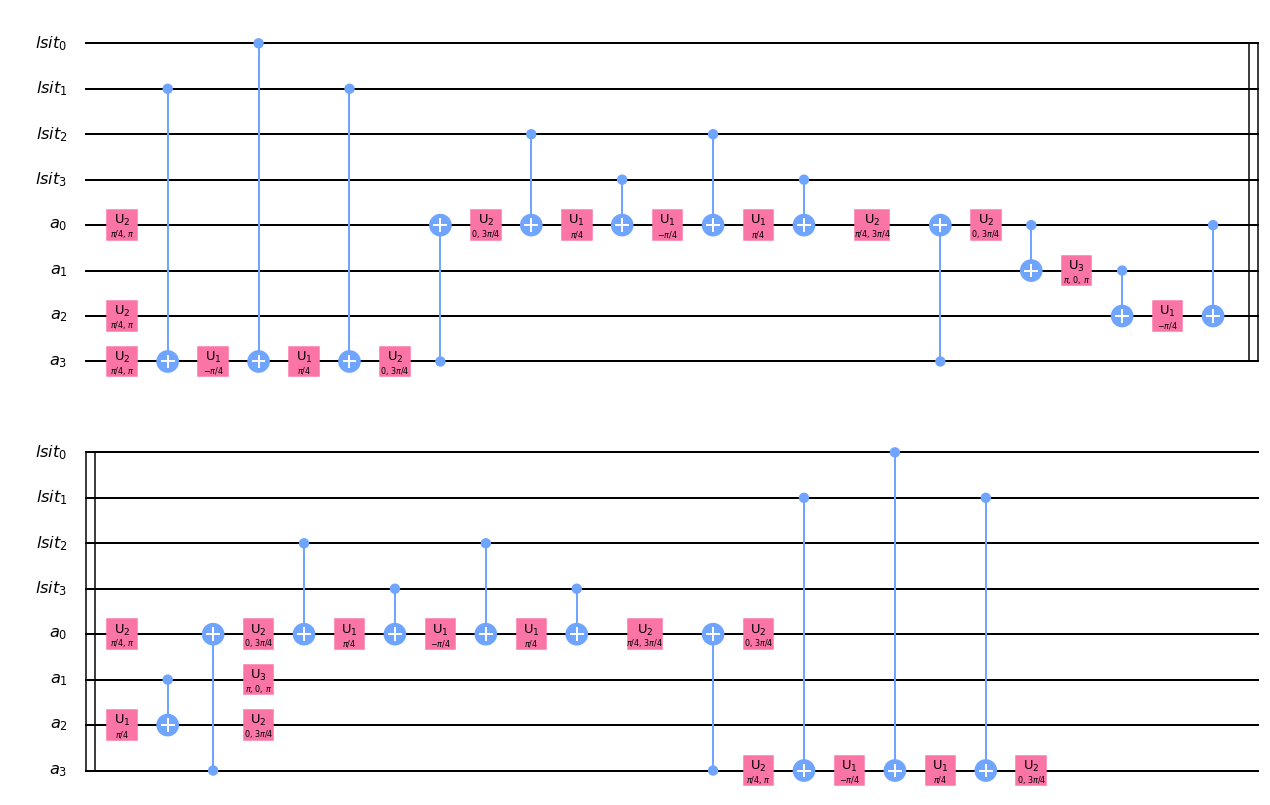

In [71]:
#EXAMPLE CIRCUIT
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute, transpile
from qiskit.quantum_info import Pauli, state_fidelity, process_fidelity
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
lsit = QuantumRegister(4, 'lsit')
AncQ = QuantumRegister(4, 'a')
qc = QuantumCircuit(lsit, AncQ)

qc.rccx(lsit[0],lsit[1],AncQ[3])
qc.rcccx(lsit[2],lsit[3],AncQ[3],AncQ[0])
qc.rccx(lsit[0],lsit[1],AncQ[3])
qc.cx(AncQ[0], AncQ[1])
qc.x(AncQ[1])
qc.rccx(AncQ[0], AncQ[1], AncQ[2])
qc.x(AncQ[1])
qc.rccx(lsit[0],lsit[1],AncQ[3])
qc.rcccx(lsit[2],lsit[3],AncQ[3],AncQ[0])
qc.rccx(lsit[0],lsit[1],AncQ[3])

qc = transpile(qc, basis_gates = ['u1','u2','u3','cx'], optimization_level=3)

qc.draw(output='mpl')

In [75]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
#new_circuit.draw(output='mpl')

In [76]:
new_circuit.count_ops()

OrderedDict([('u3', 28), ('cx', 22)])